In [ ]:
import numpy as np#librairie pour manipuler des tableaux 
from sklearn.linear_model import Perceptron#librairie pour créer un Perceptron


In [ ]:
# Python ≥3.5
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0
import tensorflow as tf
assert tf.__version__ >= "2.0"

# les imports communs
import numpy as np
import pandas as pd
import os

# Pour que la sortie soit stable d'un cycle à l'autre 
np.random.seed(42)

# Pour tracer des figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Pour les coefficients R2, RMSE qui sont respectivement le coefficient de détermination et le racine carrée de l’erreur quadratique moyenne
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Où enregistrer les chiffres
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Pour importer les données de votre google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Pour télécharger les données d'entrainement via un document présent sur Drive (attention au path)
#les données correspondent à tous les sujets de la BDD Datateststraw
xlsx = pd.ExcelFile('/content/drive/MyDrive/data/datatest_F20_8P.xlsx')
df1 = pd.read_excel(xlsx, 's1')
df2 = pd.read_excel(xlsx, 's2')
df3 = pd.read_excel(xlsx, 's3')
df4 = pd.read_excel(xlsx, 's4')
df5 = pd.read_excel(xlsx, 's5')
df6 = pd.read_excel(xlsx, 's6')
df7 = pd.read_excel(xlsx, 's7')
df8 = pd.read_excel(xlsx, 's8')
df9 = pd.read_excel(xlsx, 's9')
df10 = pd.read_excel(xlsx, 's10')

# Concaténation des données pour les ordonner 
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])

def trier_df(df, colonne):
  df.sort_values(by=colonne, inplace=True)
  return df
df_trie = trier_df(df, 'sortie')

#pd.DataFrame permet de créer et manipuler des tableaux de données en deux dimensions
X=pd.DataFrame(np.c_[df_trie['tibia_X'],df_trie['tibia_Y'],df_trie['tibia_Z'],df_trie['lumbar_X'],df_trie['lumbar_Y'],df_trie['lumbar_Z']])
Y = df_trie['sortie']


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


(400000, 6, 1)
(400000, 1)


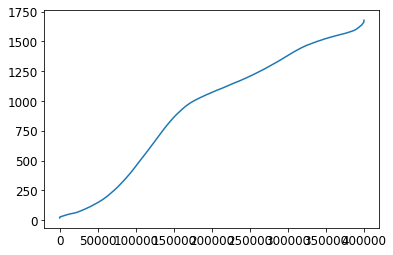

In [ ]:
#redimensionnement des données
X= X.values.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)


Y = Y.values.reshape(-1,1)
print(Y.shape)
#afficher le graphe de Y
plt.plot(Y)


(5000, 6, 1)
(5000, 1)
       tibia_X   tibia_Y   tibia_Z  lumbar_X  lumbar_Y  lumbar_Z     sortie
0    -0.267446 -0.505094 -0.793724 -0.543845  0.192204  0.073644  29.433647
1    -0.265494 -0.505056 -0.791735 -0.543003  0.192759  0.074551  31.254859
2    -0.263533 -0.505019 -0.789744 -0.542161  0.193312  0.075461  32.982808
3    -0.261562 -0.504983 -0.787752 -0.541319  0.193864  0.076374  34.620598
4    -0.259582 -0.504948 -0.785758 -0.540477  0.194415  0.077289  36.171333
...        ...       ...       ...       ...       ...       ...        ...
4995 -0.268345  0.535204  1.620206 -1.006226 -0.107239 -0.215054  29.142262
4996 -0.268755  0.533750  1.619570 -1.007011 -0.107030 -0.214714  28.771082
4997 -0.269164  0.532303  1.618930 -1.007795 -0.106822 -0.214376  28.372033
4998 -0.269572  0.530864  1.618286 -1.008578 -0.106613 -0.214037  27.943673
4999 -0.269979  0.529430  1.617639 -1.009362 -0.106403 -0.213700  27.484560

[5000 rows x 7 columns]


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


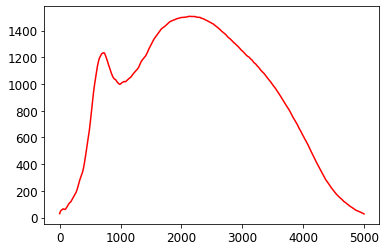

In [ ]:
# On choisit un des données de datatest de Sujet0 à Sujet10
# ex. télécharger les données datatest_F20_S3_P10 pour le test, Sujet 3, passage 10 et fréquence de 20 Hz
df_test = pd.read_excel ('/content/drive/MyDrive/data/datatest/datatest_F20_S3_P10.xlsx')

# ex. télécharger les données datatest_F20_S4_P10 pour le test, Sujet 4, passage 10 et fréquence de 20 Hz
# df_test = pd.read_excel ('/content/drive/MyDrive/data/datatest/datatest_F20_S4_P10.xlsx')

X_test = pd.DataFrame(np.c_[df_test['tibia_X'],df_test['tibia_Y'],df_test['tibia_Z'],df_test['lumbar_X'],df_test['lumbar_Y'],df_test['lumbar_Z']])
#on redimensionne les données pour que cela corresponde bien à la taille des données en sortie
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# afficher le dimension de X_test
print(X_test.shape)

Y_test = df_test['sortie']

#on redimensionne les données pour la même raison
Y_test = Y_test.values.reshape(-1,1)
print(Y_test.shape)
#afficher le graphique avec courbe Y_test en rouge
plt.plot(Y_test,'r')

print(df_test)

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense#librairie permettant de créer des couches de convolution, pooling et cachée
from keras.models import Sequential

# Appliquer le modèle Sequential de CNN
model = Sequential()
#couche de convolution à 64 neurones cachés
model.add(Conv1D(64, 3, activation='relu', input_shape=(6, 1)))
#couche de pooling
model.add(MaxPooling1D(2))
#couche de Dropout
model.add(Dropout(0.2))
#couche visible
model.add(Flatten())
#couche dense du réseau de neurones
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
#réusmé du modèle
model.summary()
#compilation du modèle
model.compile(loss="mean_squared_error", optimizer="adam")
#entraînement du modèle (les epochs correspondent aux étapes)
history = model.fit(X, Y, epochs=200)
#évaluation du modèle
mse_test = model.evaluate(X_test, Y_test)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 4, 64)             256       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 2, 64)            0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 2, 64)             0         
                                                                 
 flatten_7 (Flatten)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                      

157/157 [==============================] - 0s 1ms/step
rmse =  59.49453571370388
r2 =  0.9853355216253435


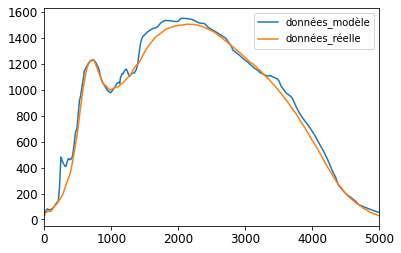

In [ ]:
#prédiciton à partir des données de test
Y_predict = model.predict(X_test)
#calcul des coefficients R2 et RMSE (cf rapport)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_predict)))
r2 = r2_score(Y_test, Y_predict)


print("rmse = ",rmse)
print("r2 = ",r2)

plt.xlim(0,5000)
#affichage des données du modèle par rapport aux données réelles (la sortie)
plt.plot(Y_predict)
plt.plot(Y_test)
plt.legend(["données_modèle", "données_réelle"], loc=1)